In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
from scipy.stats import spearmanr

In [ ]:
df = pd.read_csv('CombinedData.csv')

In [ ]:
df.sample(4)

,Date,NEPSE,Banking,Hydropower,Hotels And Tourism,Finance,Investment,LifeInsurance,Manufacture,NonLifeInsurance,Others,Mutual Fund,Microfinance,DevBank,Trading
809,2024-07-30,2696.65,1561.66,3300.69,7037.59,3244.44,100.03,12568.03,7819.88,13027.55,1998.81,21.35,5407.39,5274.22,3677.98
101,2021-07-28,3094.95,2110.03,3241.54,3888.56,2739.31,114.60,18359.47,6703.31,15063.58,2214.04,17.95,5576.13,4837.92,4083.44
502,2023-04-09,1838.48,1187.81,2408.03,3122.43,1545.94,62.39,9191.26,4249.87,8291.19,1386.74,13.18,3324.62,3351.67,2072.62
373,2022-09-04,1977.30,1328.58,2276.06,2641.56,1678.22,63.31,9322.08,4896.93,8085.50,1458.66,14.19,4470.01,3564.91,1960.98


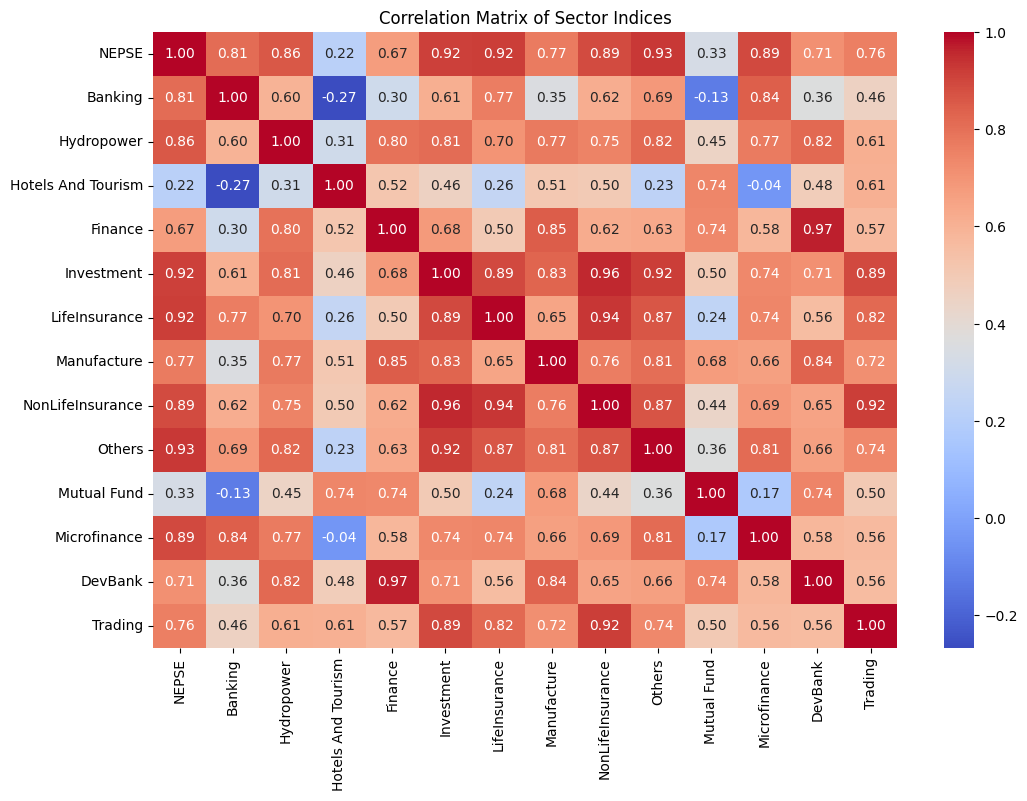

In [ ]:
corr_matrix = df.iloc[:, 1:].corr(method = 'spearman')
plt.figure(figsize = (12,8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Sector Indices")
plt.show()

In [ ]:
import numpy as np

In [ ]:
# Select the relevant features and target
features = ['Banking', 'LifeInsurance', 'Hydropower']  # Example features
target = 'NEPSE'  # Target variable

X = df[features]  # Feature matrix
y = df[target]  # Target variable


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the training and test sets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (717, 3)
Testing data shape: (180, 3)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data, then transform the test data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Convert to DataFrame if needed
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X.columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=X.columns)

print(f"Training data normalized:\n{X_train_normalized.head()}")


Training data normalized:
    Banking  LifeInsurance  Hydropower
0  0.453212       0.496691    0.809695
1  0.017568       0.136075    0.257910
2  0.633868       0.641387    0.729293
3  0.220681       0.000433    0.017105
4  0.902080       0.935807    0.819963


In [ ]:
pip install pysr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 7.1 MB/s eta 0:00:00


In [ ]:
from pysr import PySRRegressor

[juliapkg] Found dependencies: /usr/local/lib/python3.11/dist-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.11/dist-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.11/dist-packages/juliacall/juliapkg.json
[juliapkg] Locating Julia =1.10.0, ^1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.11.3 to /root/.julia/environments/pyjuliapkg/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://julialang-s3.julialang.org/bin/linux/x64/1.11/julia-1.11.3-linux-x86_64.tar.gz
             download complete
[juliapkg] Verifying download


In [ ]:
pysr_model = PySRRegressor(
    model_selection="best",
    niterations=100,
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["sqrt", "log", "exp"],
    extra_sympy_mappings={"pow": lambda x, y: x**y},
)

In [ ]:
pysr_model.fit(X_train_normalized, y_train)

# Display the best equation
print("Best equation found by PySR:")
print(pysr_model.equations_)


In [ ]:
y_pred = pysr_model.predict(X_test_normalized)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")